In [1]:
import configparser
import pandas as pd
import numpy as np

config = configparser.ConfigParser()
config.read('settings.ini')

max_count = int(config['Main']['vis_count'])
dataset_path = config['Main']['output_folder'] + '/' + config['Main']['output_file']

print('Dataset path: ' + dataset_path)

Dataset path: ./output/dataset.csv


In [2]:
df = pd.read_csv(dataset_path)
# df = df.sample(frac=1).reset_index(drop=True)
df.head()

,FileName,FileDir,Emotion,Intensity
0,1001_DFA_ANG_XX.wav,./datasets/CREMA-D/AudioWAV,angry,unknown
1,1001_DFA_DIS_XX.wav,./datasets/CREMA-D/AudioWAV,disgust,unknown
2,1001_DFA_FEA_XX.wav,./datasets/CREMA-D/AudioWAV,fear,unknown
3,1001_DFA_HAP_XX.wav,./datasets/CREMA-D/AudioWAV,happy,unknown
4,1001_DFA_NEU_XX.wav,./datasets/CREMA-D/AudioWAV,neutral,unknown


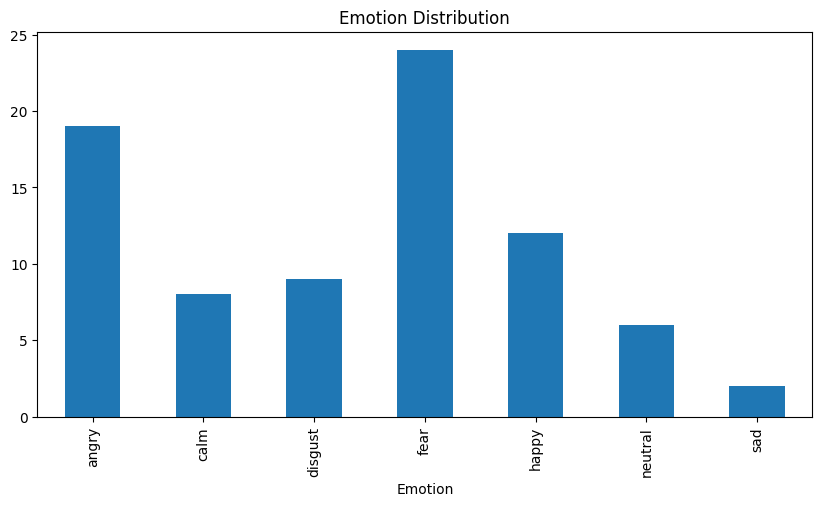

In [3]:
graph = df.groupby(['Emotion']).count()['FileName'].plot.bar(figsize=(10, 5), title='Emotion Distribution')

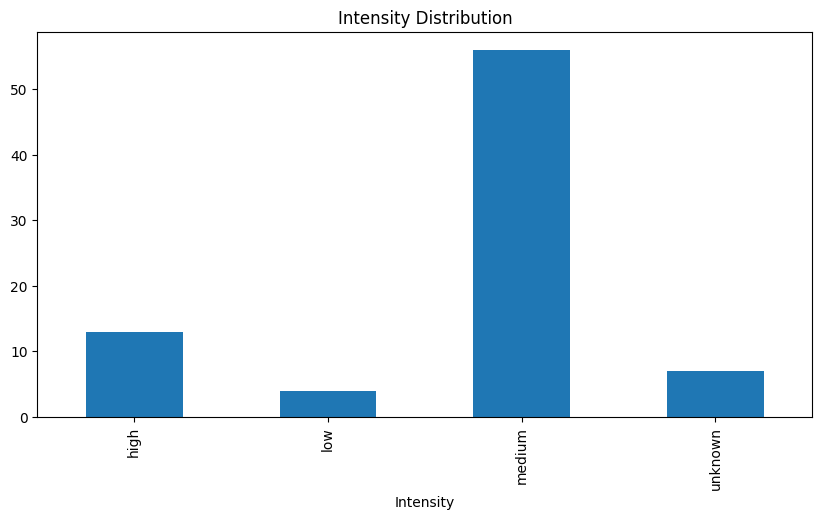

In [4]:
graph2 = df.groupby(['Intensity']).count()['FileName'].plot.bar(figsize=(10, 5), title='Intensity Distribution')

/tmp/ipykernel_33539/2712040290.py:5: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  return librosa.get_duration(filename=file)


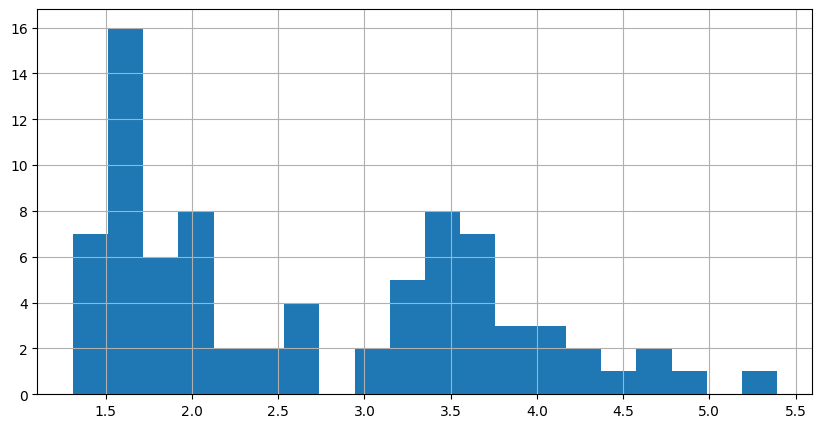

In [5]:
# Audio length histogram
import librosa

def getAudioLength(file):
    return librosa.get_duration(filename=file)

df['AudioLength'] = [getAudioLength(file) for file in df['FileDir'] + '/' + df['FileName']]

graph3 = df['AudioLength'].hist(figsize=(10, 5), bins=20)

In [6]:
# Max audio length
print('Max audio length: ' + str(df['AudioLength'].max()))

# Min audio length
print('Min audio length: ' + str(df['AudioLength'].min()))

#90% percentile
print('90% percentile: ' + str(df['AudioLength'].quantile(0.90)))

Max audio length: 5.393605442176871
Min audio length: 1.3083067092651757
90% percentile: 4.00614648526077
